# 1- Importing the Dependencies

In [2]:
import numpy as np 
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder , LabelEncoder ,MinMaxScaler,StandardScaler

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

import matplotlib.pyplot as plt

# Importing seaborn for data visualization
import seaborn as sns

# Alternatively, use scikit-learn's ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import roc_curve, roc_auc_score , classification_report

from imblearn.over_sampling import SMOTE


Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

* Customers who left within the last month – the column is called Churn.

* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.

* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.

* Demographic info about customers – gender, age range, and if they have partners and dependents.

The are no missing values in data set.

1- RowNumber: It is likely a unique identifier for each record and does not contribute directly to the analysis.

2- CustomerId: It can be used to track and differentiate individual customers within the dataset.

3- Surname: It provides information about the family name of each customer.

4- CreditScore: It is a numerical value that assesses the creditworthiness of an individual based on their 
credit history and financial behavior.

5- Geography: It provides information about the customers' geographic distribution, allowing for analysis based on regional or national factors.

6- Gender: It categorizes customers as either male or female, enabling gender-based analysis if relevant to the churn prediction.

7- Age: It represents the customer's age in years and can be used to analyze age-related patterns and behaviors.

8- Tenure: It typically represents the number of years or months the customer has been associated with the bank.

9- Balance: It reflects the amount of money in the customer's bank account at a specific point in time.
NumOfProducts: It can include various offerings such as savings accounts, loans, credit cards, etc.

10- HasCrCard: It is a binary variable with a value of 1 if the customer possesses a credit card and 0 otherwise.

11- IsActiveMember: It is a binary variable indicating whether the customer is an active member (1) or not (0) within the bank.

12- EstimatedSalary: It provides an approximation of the customer's income level, which can be relevant for analyzing churn behavior.

13- Exited: It indicates whether a customer has churned (1) or not (0) from the bank. It is the variable we aim to predict using the other features.

# 2- Data Collection & information

In [2]:
raw_df = pd.read_csv('Churn_Modelling.csv')

In [3]:
raw_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
raw_df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
raw_df.shape

(10000, 14)

In [6]:
print("Total number of records/rows present in the dataset is:",raw_df.shape[0])
print("Total number of attributes/columns present in the dataset is:",raw_df.shape[1])

Total number of records/rows present in the dataset is: 10000
Total number of attributes/columns present in the dataset is: 14


In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [9]:
raw_df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
raw_df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
# None of the columns is having missing values. So we don't have to perform Data Imputation.
raw_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
raw_df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [13]:
# There are no duplicate records present in the dataset.So we can say there is no Data Lekage in the dataset.
raw_df.duplicated().sum()

0

In [14]:
raw_df.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


1- Surname column is having very high cardinality and not relevant for predicting customer churned or not. So we can simply drop this feature.

2- Geography & Gender Columns are having low cardinality and seems relevant for predicting customer churned or not.

# 3- Data wrangling :

1- also known as data munging, refers to the process of cleaning, transforming, and preparing raw data for analysis.

2- It involves handling missing values, addressing inconsistencies and formatting data before it can be used for further analysis.

In [15]:
raw_df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5736,5737,15775116,Anderson,581,France,Male,31,3,0.00,2,0,0,89040.61,0
9646,9647,15603111,Muir,850,Spain,Male,71,10,69608.14,1,1,0,97893.40,1
6919,6920,15599084,Hopwood,782,France,Male,33,7,191523.09,1,1,1,167058.75,0
7907,7908,15688157,Padovano,683,Germany,Female,39,2,47685.47,2,1,1,86019.48,0
5260,5261,15731281,Ozuluonye,704,Germany,Female,35,3,154206.07,2,1,1,40261.49,0


1- RowNumber and CustomerId columns represents a unique value for each customer and doesn't seem relevant for predicting customer churned or not.

2- Surname column is having high cardinality* and doesn't seems relevant for predicting customer churned or not. So we can simply drop these features.

## Dropping Insignificant Features

In [16]:
# We don't need a customerID column, so I'll delete it.
df = raw_df.drop(['CustomerId','RowNumber','Surname'], axis=1)

In [17]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6643,717,Spain,Female,34,1,0.00,2,1,0,119313.74,0
9134,481,France,Male,40,3,0.00,1,1,1,32319.93,0
1153,755,Germany,Female,45,7,135643.00,1,0,0,143619.52,1
9460,744,Spain,Male,35,7,0.00,2,1,1,43036.60,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


##  target preprocessing for analysis

In [18]:
df["Exited"].unique()

array([1, 0], dtype=int64)

In [19]:
# Renaming Target Variable name and its values with more appropirate values for better Analysis.

df.rename(columns={"Exited":"Churned"},inplace=True)

df["Churned"].replace({0:"No",1:"Yes"},inplace=True)

In [20]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
7526,850,France,Female,81,1,0.00,2,1,1,59568.24,No
3444,436,Spain,Male,43,5,0.00,2,1,1,35687.43,No
131,795,Germany,Female,33,9,130862.43,1,1,1,114935.21,No
9737,710,Spain,Male,22,8,0.00,3,1,0,107292.91,No
5269,680,Germany,Male,34,6,146422.22,1,1,0,67142.97,Yes


# 4- EDA : Explorator Data Analysis

## 1. Visualizing Target Variable.

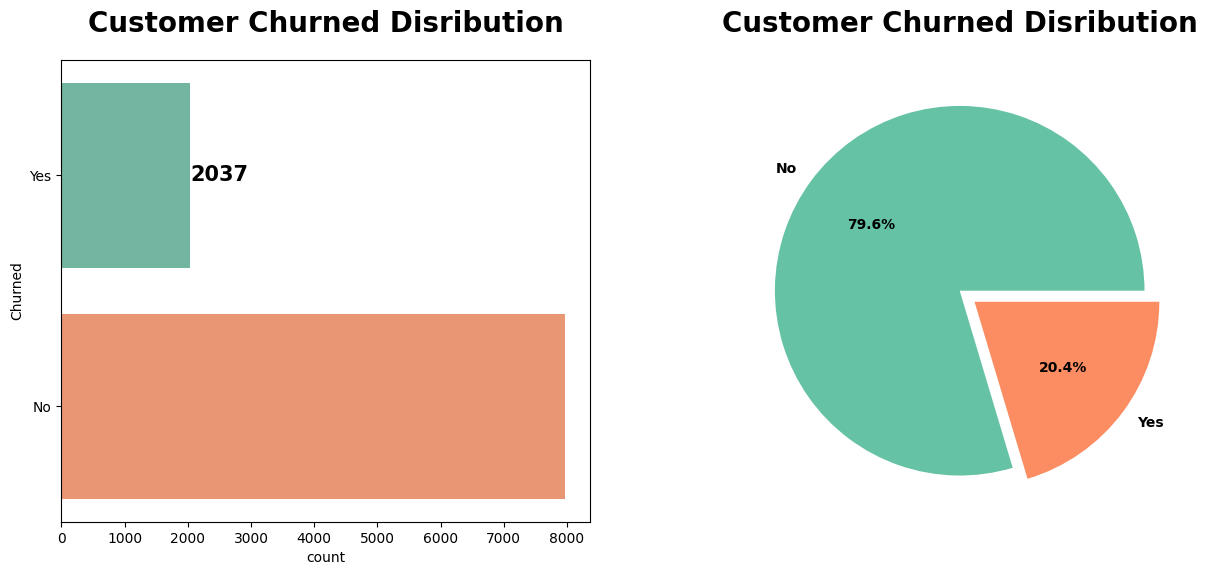

In [27]:
count = df["Churned"].value_counts()

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax=sns.countplot(y ="Churned" ,data = df , hue="Churned",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0,0.1])
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)
plt.show()

* There is **huge class-imbalance** which can lead to **bias in model performance.**
* So to **overcome** this **class-imbalance** we have to use **over-sampling technique** from **SMOTE**.

## 2. Visualizing Customer Churned by Gender.

In [28]:
def countplot(column):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x=column, data=df, hue="Churned",palette="Set2")
    for value in ax.patches:
        percentage = "{:.1f}%".format(100*value.get_height()/len(df[column]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        ax.annotate(percentage, (x,y), fontweight="black",size=15)
        
    plt.title(f"Customer Churned by {column}",fontweight="black",size=20,pad=20)
    plt.show()

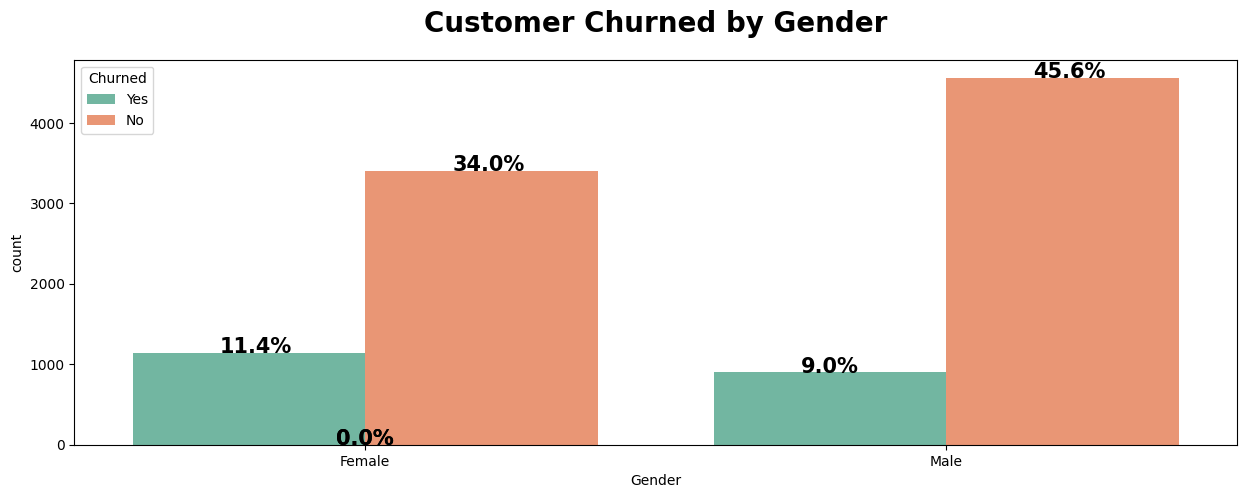

In [29]:
countplot("Gender")

* The **churned probabillity** is more for **Feamle Customers** compared to **male customers**.
* Which means **female customers** are **more deactivating their banking facilities** compared to **male customers.**

Recommendation : 

* Bank can **Develop targeted marketing campaigns** specifically tailored to **female customers.**
* Bank can **Focus on enhancing** the overall **customer experience** for **female customers.**

## 3. Visualizing Customer Churned by Geoprahical Region.

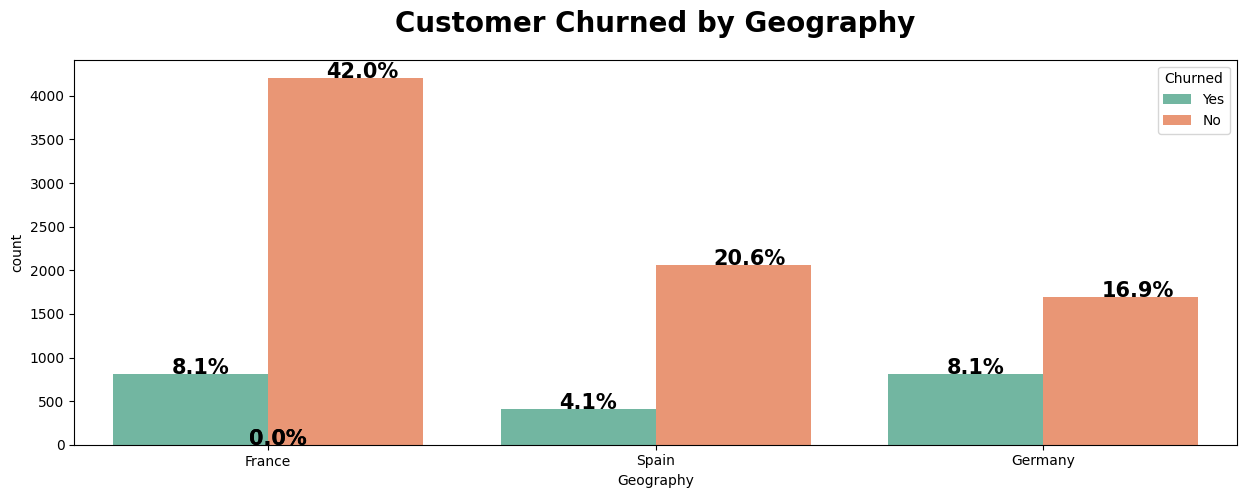

In [64]:
countplot("Geography")

* **Half of the customers** are from **France** followed by Germany and Spain.
* Despite of the **huge total customers difference** between France & Germany the **churned rate** for **France and Germany** customers are **same.**
* There are **almost equal customers** from **Spain & Germany**, but the **Churn rate** is **almost double** in **Germany** when **compared with spain.**

 Recommendation:

 * Bank can **analyze** the **banking facilites & behaviour** of **customers from france** and try to **implement those on Germany customers.**

## 4. Visualizing Visualizing Customer Churn by "HasCrCard".

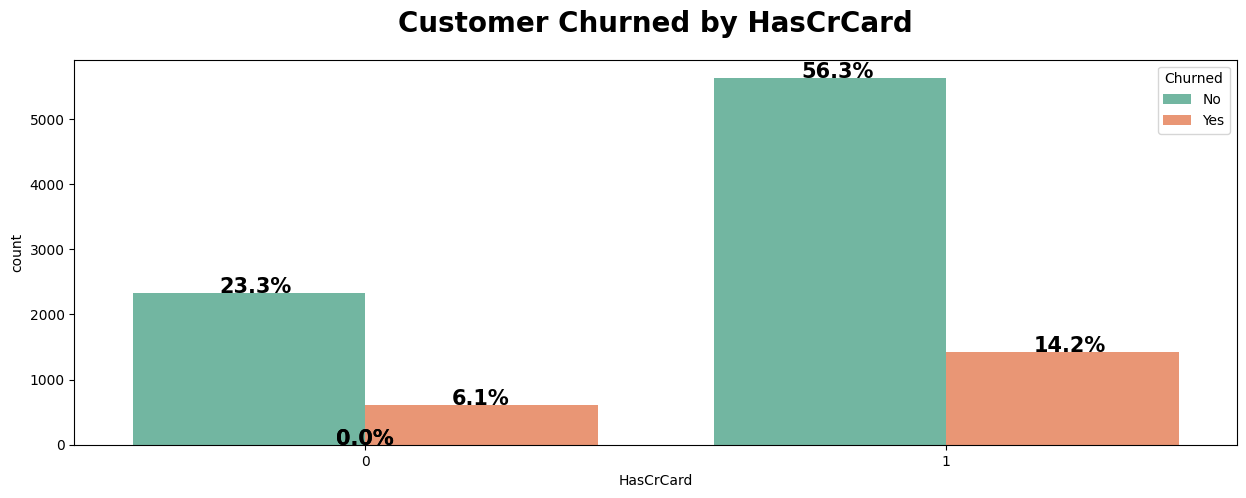

In [30]:
countplot("HasCrCard")

* **More than 70%** of customers are having **credit card.** 
* The **churn probability value** for the **both** the categories is **almost 1:4.**
* So **credit card is not affecting the churn of customers.**

## 5. Visualizing Customer Churned by "NumOfProducts".

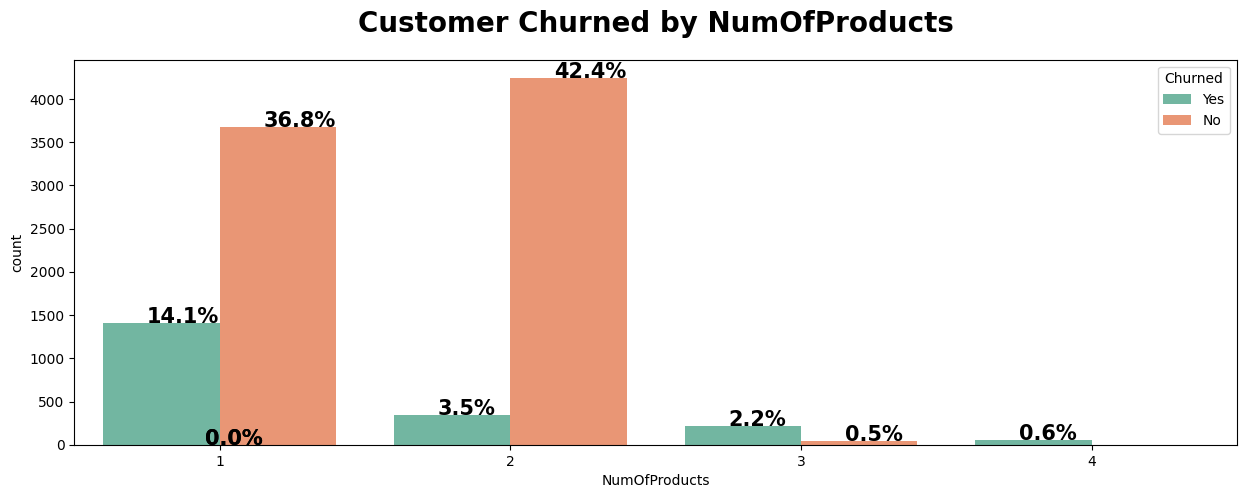

In [31]:
countplot("NumOfProducts")

* **Most** of the customers are having **either 1 or 2** total number of banking products.

* **Very few** customers are having **more than 2** total number of banking products.

* **The lowest churn rate** is with customers having **only 2 products.** 

* There is **very high churn rate** in customers having **1 product** or **more than 2 products.**

* **Note:**

    1. We can do **feature engineering** by **grouping the customers having products more than 2 together** to **reduce the class imbalance.**
    
    2. Because **Class Imbalance** leads to **bias in model** and **misrepresentation of minority class.**

Recommendation:

* The **bank can try to convince the customers** to have **atleast 2 banking products.**

* They can provide **Rewards and Incentives** to the **customers having atleast 2 banking products.**

## 6. Visualizing Customer Churned by "IsActiveMember".

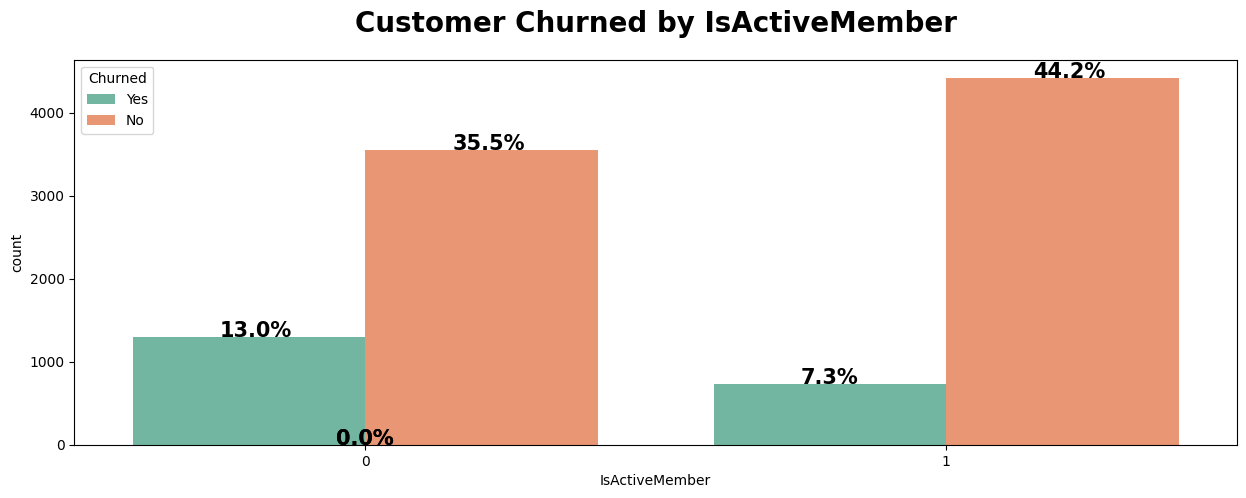

In [32]:
countplot("IsActiveMember")

* There is **approxiamately equal customer** who are **either active or not active.**

* But the **churn rate %** in **not active customers is almost double** compared to **active customers.**

* So **customers which are not active are morely likely to deactivate their banking facilities.**

Recommendation:
    
* Bank can provide **Regular Communication and Updates**, and **Enhanced Digital Services** so that customers remain active to the banking facilities.

## 7. Visualizing Customer Churned by "Tenure".

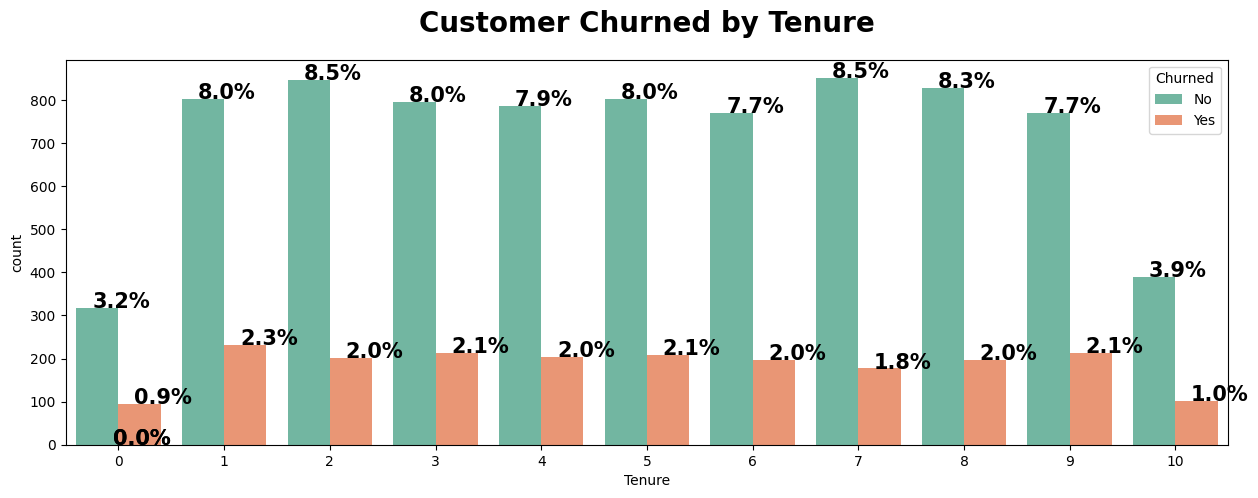

In [33]:
countplot("Tenure")

* The **highest tenure is 10 years** which means that those customers have **opened their account 10 years back.**

* Since there is **almost similar distribution of churn status** we can't make any specific inference.

## 8. Visualizing Customer Churned by "CreditScore".

In [45]:
def continous_plot(column):
    plt.figure(figsize=(13,6))
    plt.subplot(1,2,1)
    sns.histplot(x=column,hue="Churned",data=df,kde=True,palette="Set2")
    plt.title(f"Distribution of {column} by Churn Status",fontweight="black",pad=20,size=15)

    plt.subplot(1,2,2)
    sns.boxplot(y= column,data=df,hue="Churned" ,palette="Set2")
    plt.title(f"Distribution of {column} by Churn Status",fontweight="black",pad=20,size=15)
    plt.tight_layout()
    plt.show()

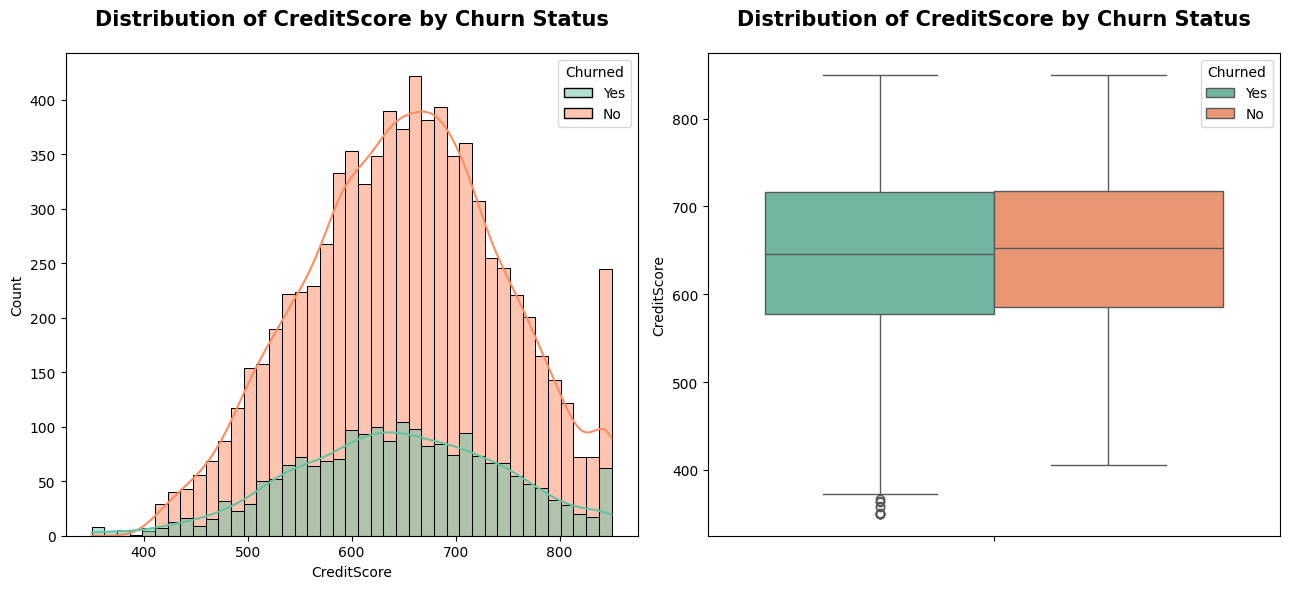

In [46]:
continous_plot("CreditScore")

* The **Median CreditScore** of **both churned** and **not churned** customers are **approxiamately equal.**

* Since the **values are approximately equal** for both **churn status** we can't generate any **relevant inference.**

## 9. Visualizing Customer Churned by "Age".

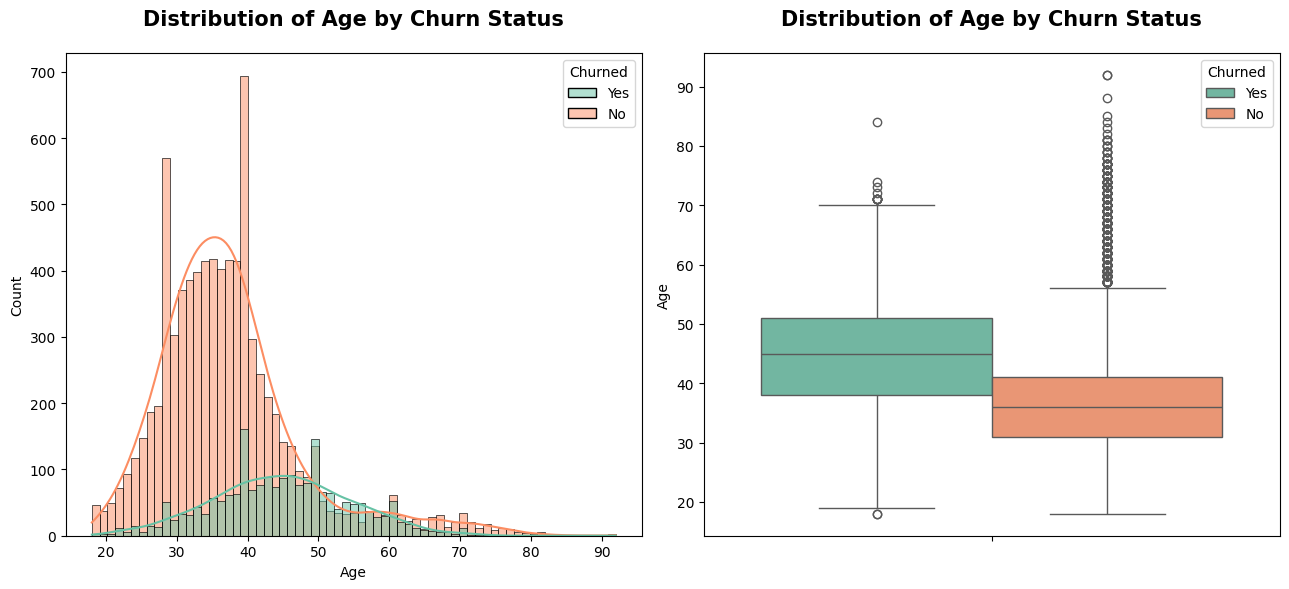

In [47]:
continous_plot("Age")

* The **distribution is right skewed** because of **presence of outliers** which can lead to **overfitting in model.**

* To **overcome this right-skewed distribution** we can use **log normal transformation** technique to bring a **normal distribution.**

## 10. Visualizing Customer Churned by "Balance."

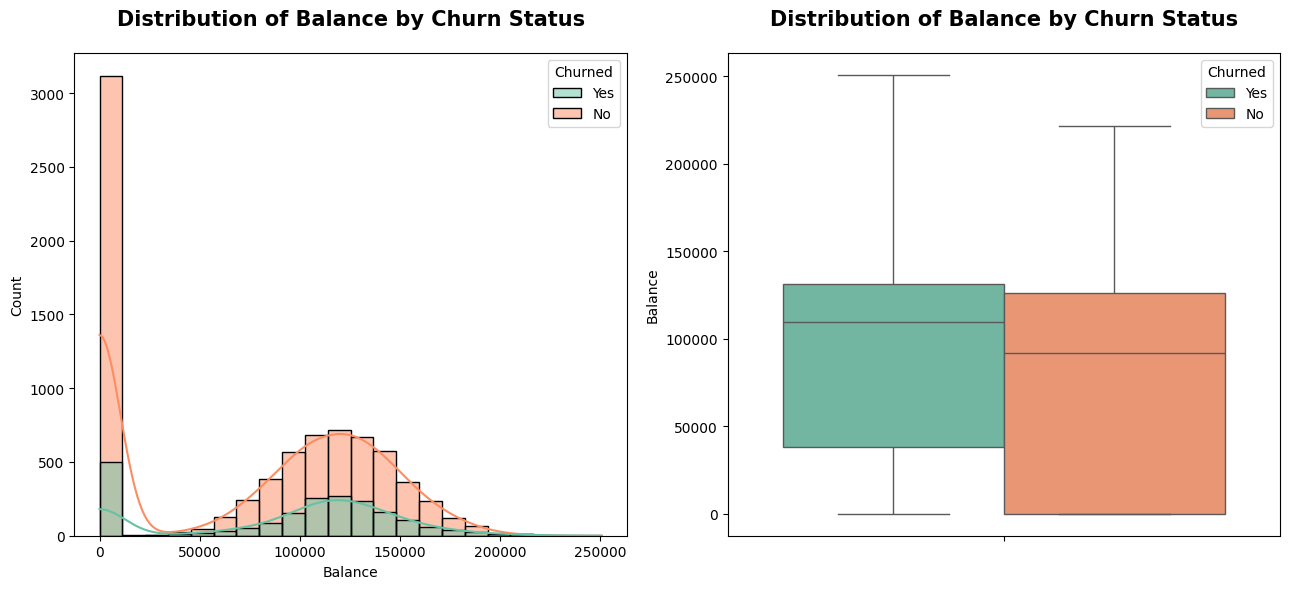

In [48]:
continous_plot("Balance")

* **More than 3000 customers** are having their **account balance equal to zero.**

* Customers with **zero balance** are more likely to **deactivate their account.**

* **Excluding the zero value** we can observe a **normal distribution.** So don't have to use any other techniques.
    
 
 * **Note:-**
    * We can do **Feature Engineering** by **grouping** the customers with account **balance equal to 0** and **balance more than 0 separately.**
    

## 11. Visualizing Customer Churned by "Estimated Salary".

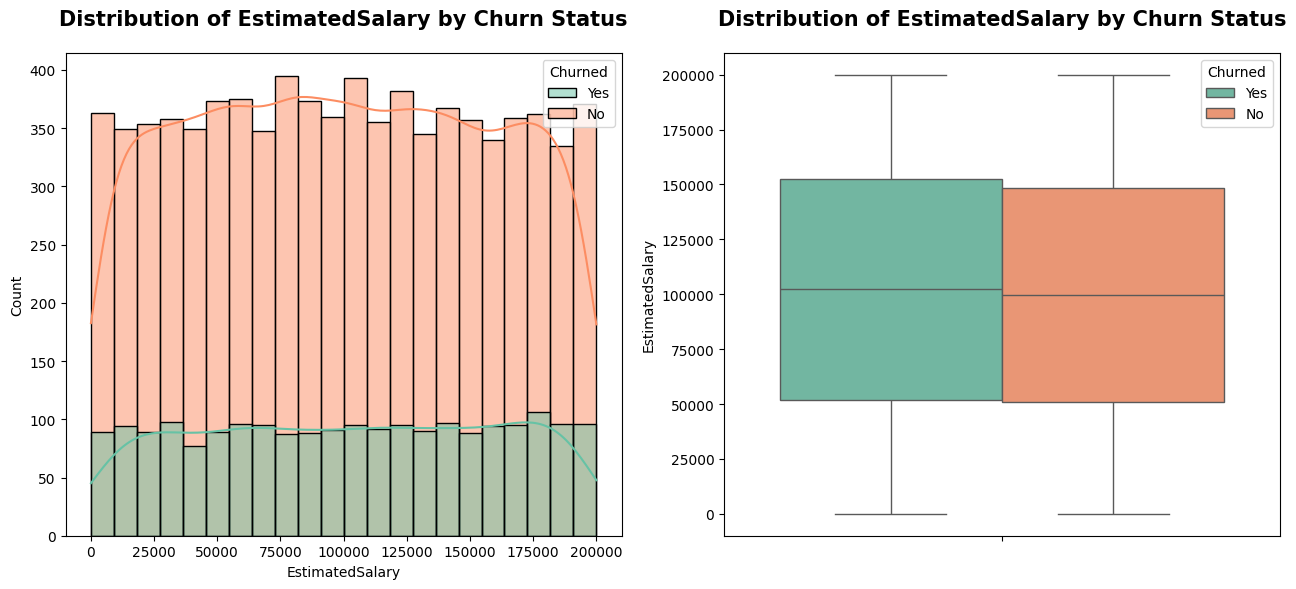

In [49]:
continous_plot("EstimatedSalary")

* The **median value of EstimatedSalary** is **approxiamately same** for both the **churned categories.**
* Since the distribution is **kind of similar** for **both churn category** we can't make any **relevant inference.**

# 5- Feature Engineering

## 1. create new feature from "NumOfProducts" Feature.

In [50]:
conditions = [(df["NumOfProducts"]==1), (df["NumOfProducts"]==2), (df["NumOfProducts"]>2)]
values =     ["One product","Two Products","More Than 2 Products"]

In [51]:
df["Total_Products"] = np.select(conditions,values)

In [52]:
df.drop(columns="NumOfProducts", inplace=True)

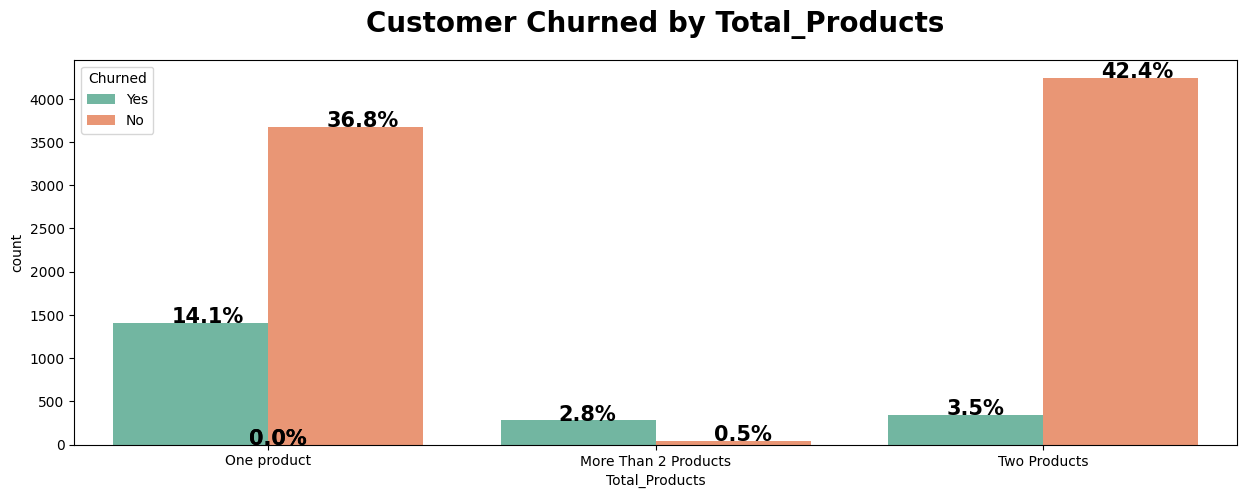

In [53]:
# Visualizing The New Feature "Total_Products"
countplot("Total_Products")

## 2. Creating New Feature From "Balance" Feature.

In [55]:
conditions = [(df["Balance"]==0), (df["Balance"]>0)]
values = ["Zero Balance","More Than zero Balance"]

In [56]:
df["Account_Balance"] = np.select(conditions, values)

In [57]:
df.drop(columns="Balance",inplace=True)

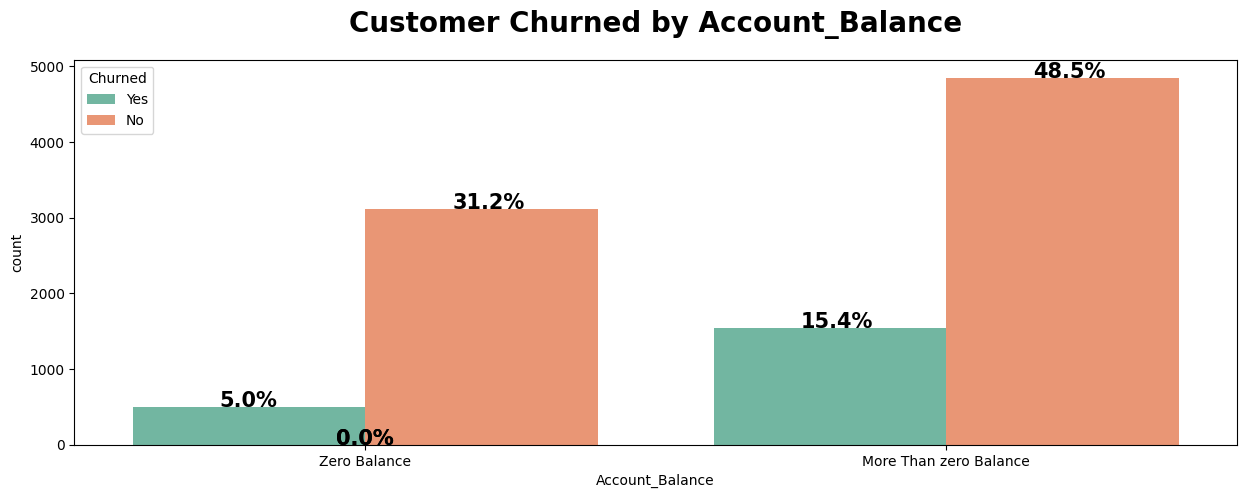

In [58]:
# Visualizing The New Feature "Account_Balance".
countplot("Account_Balance")

# 6- Data preprocessing

In [61]:
num_cols = df.select_dtypes(exclude = 'O').columns.tolist()
num_cols

['CreditScore',
 'Age',
 'Tenure',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [68]:
df.dtypes

CreditScore                                 int64
Age                                         int64
Tenure                                      int64
HasCrCard                                   int64
IsActiveMember                              int64
EstimatedSalary                           float64
Churned                                     int64
Geography_France                            uint8
Geography_Germany                           uint8
Geography_Spain                             uint8
Gender_Female                               uint8
Gender_Male                                 uint8
Total_Products_More Than 2 Products         uint8
Total_Products_One product                  uint8
Total_Products_Two Products                 uint8
Account_Balance_More Than zero Balance      uint8
Account_Balance_Zero Balance                uint8
dtype: object

In [62]:
cat_cols = df.select_dtypes(include = 'O').columns.tolist()
cat_cols

['Geography', 'Gender', 'Churned', 'Total_Products', 'Account_Balance']

In [63]:
for column in cat_cols:
    print(f"Unique Values in {column} column is:",df[column].unique())
    print("-"*100,"\n")

Unique Values in Geography column is: ['France' 'Spain' 'Germany']
---------------------------------------------------------------------------------------------------- 

Unique Values in Gender column is: ['Female' 'Male']
---------------------------------------------------------------------------------------------------- 

Unique Values in Churned column is: ['Yes' 'No']
---------------------------------------------------------------------------------------------------- 

Unique Values in Total_Products column is: ['One product' 'More Than 2 Products' 'Two Products']
---------------------------------------------------------------------------------------------------- 

Unique Values in Account_Balance column is: ['Zero Balance' 'More Than zero Balance']
---------------------------------------------------------------------------------------------------- 



In [64]:
cat_cols.remove('Churned')
cat_cols

['Geography', 'Gender', 'Total_Products', 'Account_Balance']

## 1. Performing One Hot Encoding on Categorical Features.

In [65]:
df = pd.get_dummies(columns=cat_cols, data=df)

## 2.Encoding Target Variable.

In [66]:
df["Churned"].replace({"No":0,"Yes":1},inplace=True)

In [67]:
df.head()

,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Total_Products_More Than 2 Products,Total_Products_One product,Total_Products_Two Products,Account_Balance_More Than zero Balance,Account_Balance_Zero Balance
0,619,42,2,1,1,101348.88,1,1,0,0,1,0,0,1,0,0,1
1,608,41,1,0,1,112542.58,0,0,0,1,1,0,0,1,0,1,0
2,502,42,8,1,0,113931.57,1,1,0,0,1,0,1,0,0,1,0
3,699,39,1,0,0,93826.63,0,1,0,0,1,0,0,0,1,0,1
4,850,43,2,1,1,79084.10,0,0,0,1,1,0,0,1,0,1,0


## 3. Checking Skewness of Continous Features.

In [70]:
cols = ["CreditScore","Age","EstimatedSalary"]
df[cols].skew().to_frame().rename(columns={0:"Feature Skewness"})

,Feature Skewness
CreditScore,-0.071607
Age,1.011320
EstimatedSalary,0.002085


* **Age Feature** is **highly right-skewed** , which conveys that there is presence of **positive outliers.**

* **Skewness** can **negatively impact** the **performance** of certain machine learning algorithms, like **DecisionTree & Linear Models.**

* To overcome the **right-skewed distribution** we can use **log normal transformation** to achieve a **normal distribution.**

## 4. Performing Log Transformation on Age Column.

In [71]:
#Storing the previous Age values to compare these values with the transformed values.
old_age = df["Age"]     

In [72]:
df["Age"] = np.log(df["Age"])

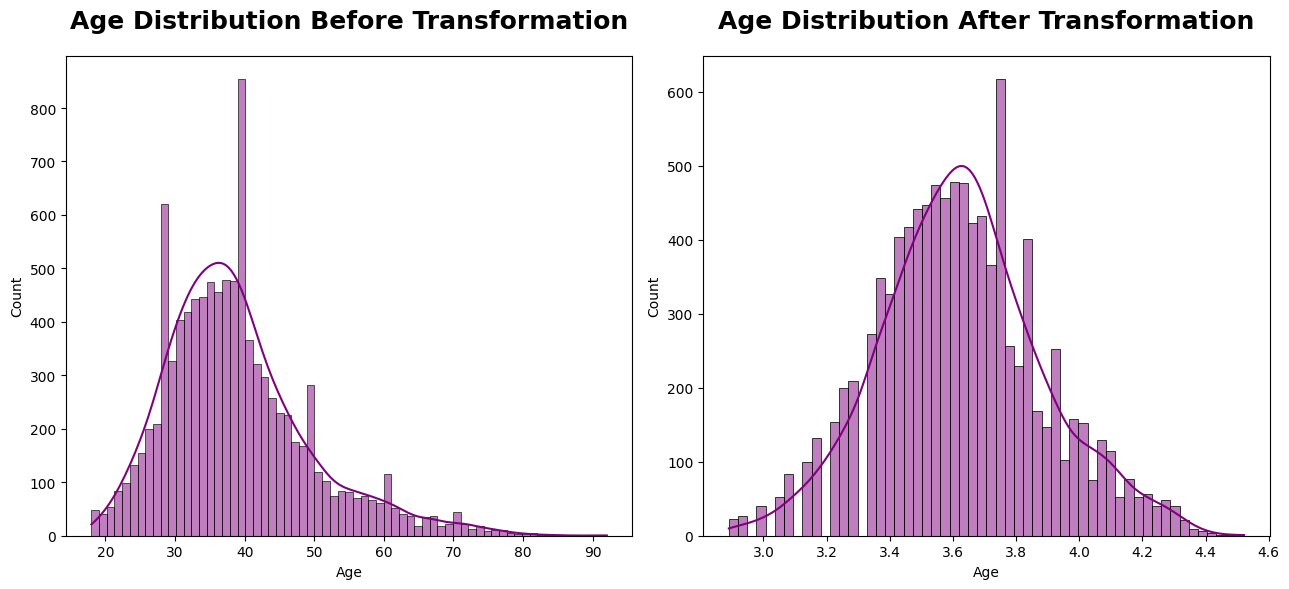

In [73]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(old_age, color="purple", kde=True)
plt.title("Age Distribution Before Transformation",fontweight="black",size=18,pad=20)

plt.subplot(1,2,2)
sns.histplot(df["Age"], color="purple", kde=True)
plt.title("Age Distribution After Transformation",fontweight="black",size=18,pad=20)
plt.tight_layout()
plt.show()

* After applying **log normal transformation** the **age feature has achieved** a **normal distribution.**

* This will **help model** to find more **relevant patterns** and build a more **accurate model.** 

# 7- splitting features and target from dataset

In [74]:
X = df.drop(columns=["Churned"])
y = df["Churned"]

In [75]:
print(f'size of features{X.shape}')
print(f'size of label{y.shape}')

size of features(10000, 16)
size of label(10000,)


In [79]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,shuffle=True,random_state=0)

In [80]:
print("Shape of x_train is:",x_train.shape)
print("Shape of x_test is: ",x_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of x_train is: (8000, 16)
Shape of x_test is:  (2000, 16)
Shape of y_train is: (8000,)
Shape of y_test is:  (2000,)


In [82]:
y_test.value_counts()

0    1593
1     407
Name: Churned, dtype: int64

In [81]:
y_train.value_counts()

0    6370
1    1630
Name: Churned, dtype: int64

# 8- Applying SMOTE 

    to Overcome the Class-Imbalance in Target Variable.

In [83]:
smt = SMOTE(random_state=42)

x_train_resampled,y_train_resampled = smt.fit_resample(x_train,y_train)

In [85]:
print("Shape of x_train after resampling is:",x_train_resampled.shape)
print("Shape of y_train after resampling is:",y_train_resampled.shape)

Shape of x_train after resampling is: (12740, 16)
Shape of y_train after resampling is: (12740,)


In [86]:
y_train_resampled.value_counts().to_frame()

,Churned
1,6370
0,6370


# 8- Training the model

In [88]:
scaler = StandardScaler() # Standardization

# Apply the scaler to the features
x_train_resampled = scaler.fit_transform(x_train_resampled)
x_test = scaler.transform(x_test)

In [89]:
model = LogisticRegression()
# training the Logistic Regression model with the training data
model.fit(x_train_resampled, y_train_resampled)

LogisticRegression()

In [90]:
# prediction on training data

prediction_on_training_data = model.predict(x_train_resampled)
accuracy_on_training_data = accuracy_score(y_train_resampled, prediction_on_training_data)

print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.8956043956043956


In [92]:
# prediction on test data

prediction_on_test_data = model.predict(x_test)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.8405


In [93]:
cm = confusion_matrix(y_test, prediction_on_test_data)

print(cm)

[[1500   93]
 [ 226  181]]


In [4]:
classification_report(y_test, prediction_on_test_data)

NameError: name 'y_test' is not defined

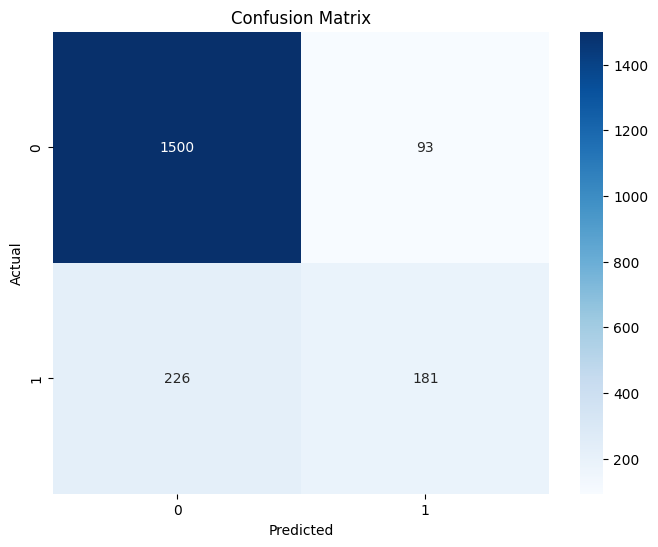

In [94]:
# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [95]:
rf_Recall = recall_score(y_test, prediction_on_test_data)
rf_Precision = precision_score(y_test, prediction_on_test_data)
rf_f1 = f1_score(y_test, prediction_on_test_data)
rf_accuracy = accuracy_score(y_test, prediction_on_test_data)

In [96]:
ndf = [(rf_Recall, rf_Precision, rf_f1, rf_accuracy)]

rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
rf_score.insert(0, 'Logistic Regression model', 'output')
rf_score

,Logistic Regression model,Recall,Precision,F1 Score,Accuracy
0,output,0.444717,0.660584,0.531571,0.8405


In [97]:
fpr, tpr, thresholds = roc_curve(y_test, prediction_on_test_data)
auc = roc_auc_score(y_test, prediction_on_test_data)

In [99]:
print(roc_curve(y_test, prediction_on_test_data))

(array([0.        , 0.05838041, 1.        ]), array([0.        , 0.44471744, 1.        ]), array([inf,  1.,  0.]))


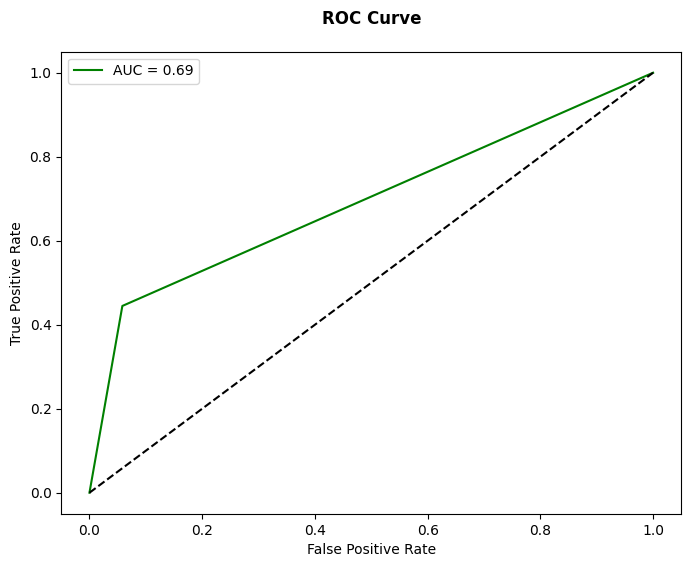

In [98]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve",pad=20,fontweight="black")
plt.legend()
plt.show()

1- Initialize the LabelEncoder 
label_encoder = LabelEncoder()

2- Fit and transform the 'Gender' column

df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])


2- df['Gender_encoded'] = df['Gender'].apply(lambda x: 1 if x=='male' else 0)

3- mms = MinMaxScaler() # Normalization

4- ss = StandardScaler() # Standardization


# End :